# Load Data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [82]:
#import dataset
df_load = pd.read_csv('Data//telco.csv')

#Tampilkan jumlah baris dan kolom
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head(5))

#Jumlah ID yang unik
print(df_load.customerID.nunique())

(7113, 22)
   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBi

In [96]:
print('\ntipe data setiap kolom:\n',df_load.dtypes)


tipe data setiap kolom:
 UpdatedAt             int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


# Cleaning Data

## Mendeteksi Nilai yang tidak Standar

Mendeteksi apakah ada nilai-nilai dari variable kategorik yang tidak standard. Hal ini biasanya terjadi dikarenakan kesalahan input data. Perbedaan istilah menjadi salah satu faktor yang sering terjadi, untuk itu dibutuhkan standardisasi dari data yang sudah ter-input.

In [83]:
# Masukkan variable
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
	print('\nUnique Values Count Before Standardized Variable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
gender
Male         3581
Female       3512
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
SeniorCitizen
0    5962
1    1151
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Partner
Partner
No     3676
Yes    3437
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Dependents
Dependents
No     4978
Yes    2115
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
PhoneService
Yes    6423
No      690
Name: count, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
MultipleLines
No                  3428
Yes                 2995
No phone service     690
Name: count, dtype: int64

Unique Values Count Before Standardized Variable InternetService
InternetService
Fiber optic    3125
DSL            2451
No             1537
Name: count, dtyp

## Menstandarisasi Variabel Kategorik

Setelah kita mengeteahui variable mana saja yang ada nilai tidak standard, maka kita standardkan dengan pola terbanyak nya, dengan syarat tanpa mengubah maknanya. Contoh : Iya -> Yes Kemudian liat kembali unique values dari masing-masing variable yang sudah di ubah.


In [84]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
	print('\nUnique Values Count After Standardized Variable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
gender
Male      3587
Female    3526
Name: count, dtype: int64

Unique Values Count After Standardized Variable Dependents
Dependents
No     4978
Yes    2135
Name: count, dtype: int64

Unique Values Count After Standardized Variable Churn
Churn
No     5195
Yes    1875
Name: count, dtype: int64


## Memfilter Duplikasi ID Number Pelanggan

Memastikan bahwa tidak ada Id Number pelanggan yang duplikat. Biasanya duplikasi ID number ini tipenya:

*   Duplikasi dikarenakan inserting melebihi satu kali dengan nilai yang sama tiap kolomnya
*   Duplikasi dikarenakan inserting beda periode pengambilan data

In [85]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 7017


Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

## Menghapus Unnecessary Columns dari data

In [88]:
df_load_cleaned = df_load.drop(['customerID', 'UpdatedAt'], axis=1)
print(df_load_cleaned.head())

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7112  Female              0      No        Yes     1.0          Yes   
0     Female              0     Yes         No     1.0           No   
1       Male              0      No         No    34.0          Yes   
2       Male              0      No         No     2.0          Yes   
3       Male              0      No         No    45.0           No   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
7112                No     Fiber optic             No           No   
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7112               No          No         Yes             Yes  Month-to

# EDA

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

* Univariat Analysis — analisis deskriptif dengan satu variabel.
* Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
* Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, kita diminta untuk melihat persebaran dari:

* Prosentase persebaran data Churn dan tidaknya dari seluruh data
* Persebarang data dari variable predictor terhadap label (Churn)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


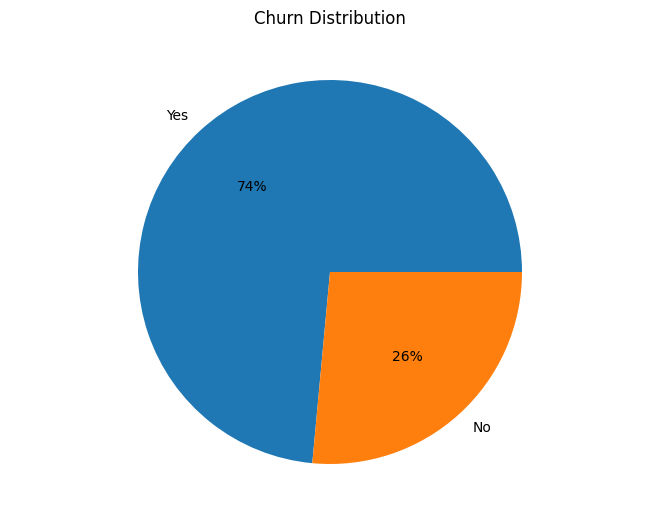

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi percentase Churn
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load_cleaned.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Churn Distribution')
plt.show()

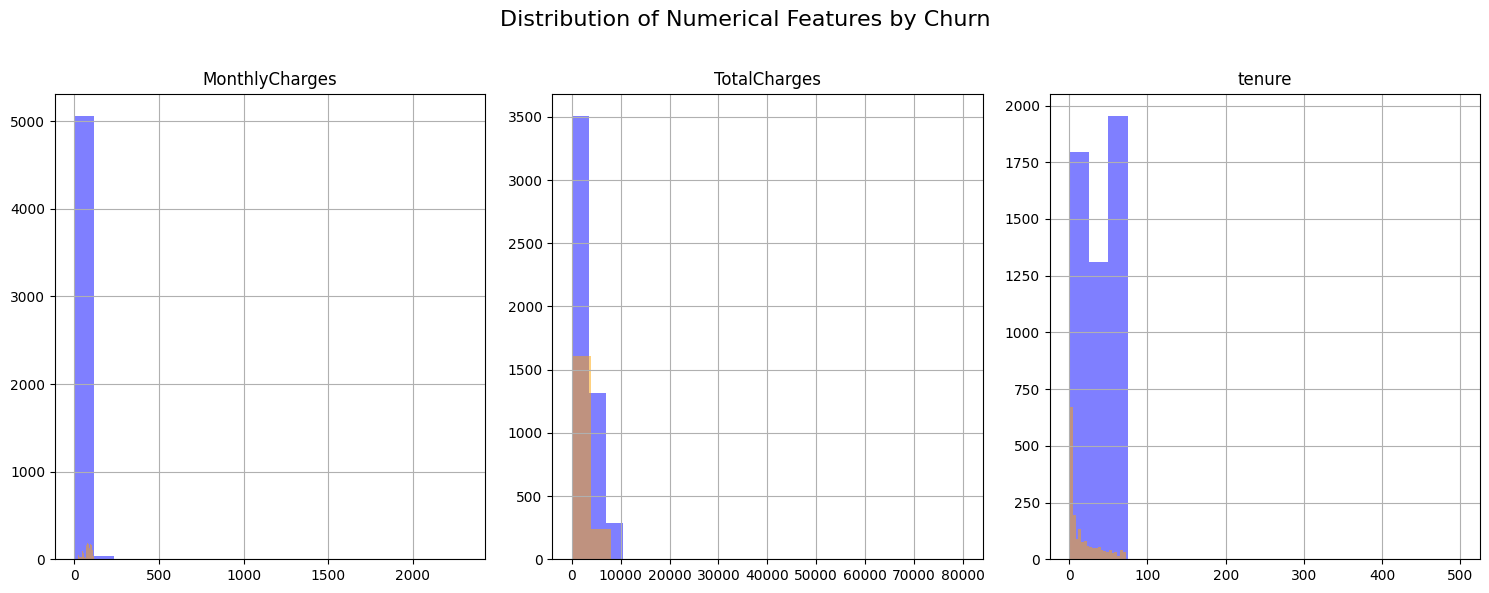

In [90]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
df_load_cleaned[df_load_cleaned.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load_cleaned[df_load_cleaned.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
fig.suptitle('Distribution of Numerical Features by Churn\n', fontsize=16)
plt.tight_layout()
plt.show()

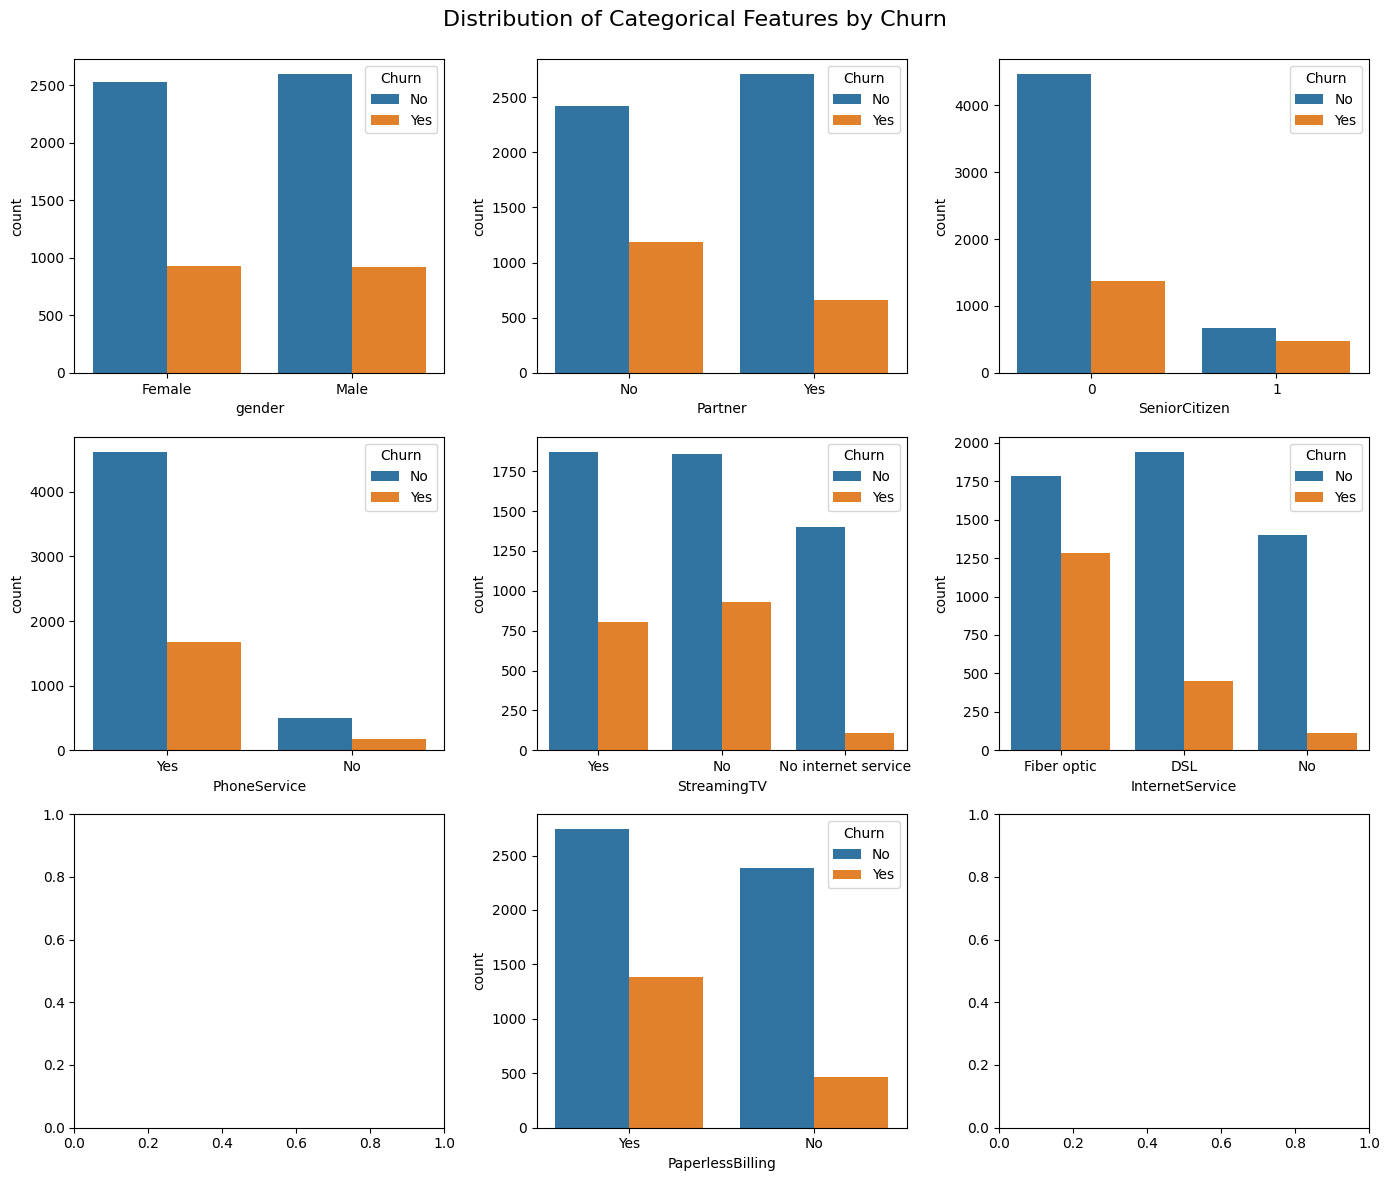

In [91]:
# categorical chart
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load_cleaned, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load_cleaned, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load_cleaned, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load_cleaned, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load_cleaned, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load_cleaned, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load_cleaned, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
fig.suptitle('Distribution of Categorical Features by Churn\n', fontsize=16)
plt.tight_layout()
plt.show()

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

* Dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.
* pada tahap numerical featrue dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.
* pada tahap categorical feature dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).

## Mendeteksi Adanya Outlier Menggunakan Boxplot

Mendeteksi pencilan dari suatu nilai (outlier) salah satunya bisa melihat plot dari data tersebut menggunakan boxplot. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman). Berikut adalah tampilan umum dari boxplot dalam merepresentasikan outliers.

Persebaran data sebelum ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  6918.000000     6991.000000   7002.000000
mean     32.763805       65.776806   2307.193502
std      25.210245       50.393997   2578.044192
min       0.000000        0.000000     19.000000
25%       9.000000       36.125000    404.662500
50%      30.000000       70.450000   1401.275000
75%      56.000000       89.900000   3801.600000
max     500.000000     2311.000000  80000.000000 



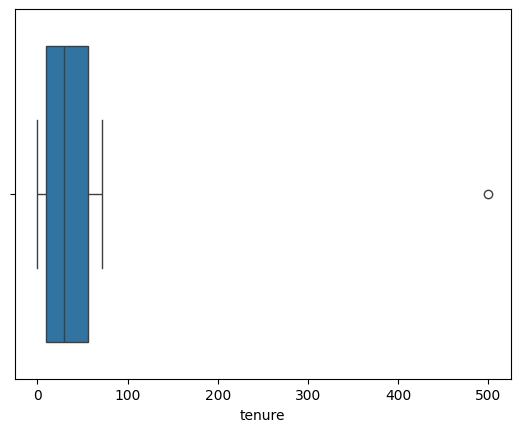

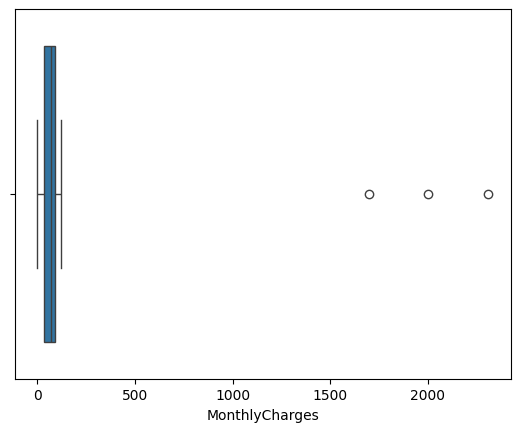

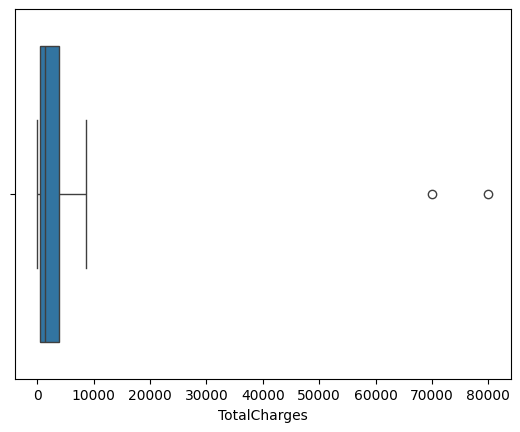

In [92]:
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

print('Persebaran data sebelum ditangani Outlier:')
print(df_load_cleaned[['tenure','MonthlyCharges','TotalCharges']].describe(),'\n')
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df_load_cleaned['tenure'])
plt.show()

plt.figure()
sns.boxplot(x=df_load_cleaned['MonthlyCharges'])
plt.show()

plt.figure()
sns.boxplot(x=df_load_cleaned['TotalCharges'])
plt.show()

# Preprocessing

## Splitting train and test

In [102]:
from sklearn.model_selection import train_test_split

X = df_load_cleaned.drop('Churn', axis=1)
y = df_load_cleaned['Churn']
    
# Train-Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
print(f"Data latih diproses: {x_train.shape}")
print(f"Data tes diproses: {x_test.shape}")

Data latih diproses: (5613, 19)
Data tes diproses: (1404, 19)


## Mengatasi Missing Values 

Variable yang bersifat numeric  di isi dengan median dari masing-masing variable tersebut.

In [103]:
print('Status Missing Values :',df_load_cleaned.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load_cleaned.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
Churn               43
MonthlyCharges      26
TotalCharges        15
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
OnlineSecurity       0
PhoneService         0
MultipleLines        0
InternetService      0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
StreamingTV          0
PaperlessBilling     0
Contract             0
StreamingMovies      0
PaymentMethod        0
dtype: int64


In [104]:
from sklearn.impute import SimpleImputer
#Handling missing values num vars with median
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
imputer = SimpleImputer(strategy='median')
imputer.fit(x_train[numerical_cols]) # Fit on Train
x_train[numerical_cols] = imputer.transform(x_train[numerical_cols])
x_test[numerical_cols] = imputer.transform(x_test[numerical_cols])

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(x_train.isnull().sum().sort_values(ascending=False))
print(x_test.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


## Mengatasi Outlier

Setelah kita mengetahui variable mana saja yang terdapat pencilan (outlier), selanjutnya kita akan atasi outlier dengan menggunakan metode interquartile range (IQR).
Tentukan:
* Nilai minimum dan maximum data di tolerir
* Ubah nilai yang di luar range minimum & maximum ke dalam nilai minimum dan maximum

Persebaran data setelah ditangani Outlier:
            tenure  MonthlyCharges  TotalCharges
count  5613.000000     5613.000000   5613.000000
mean     32.701051       65.471940   2310.276866
std      24.338125       29.992308   2270.853625
min       0.000000        0.000000     19.000000
25%       9.000000       39.550000    404.350000
50%      30.000000       70.900000   1434.350000
75%      55.000000       90.050000   3846.350000
max      72.000000      165.800000   9009.350000 



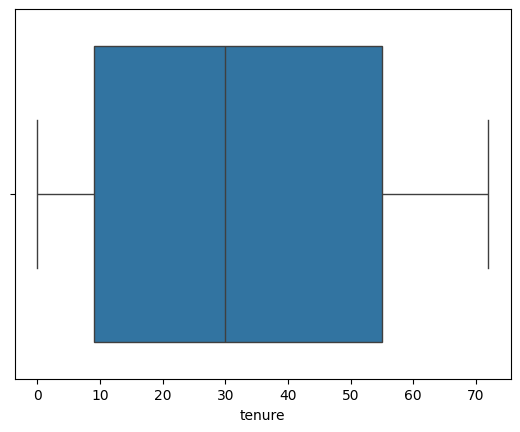

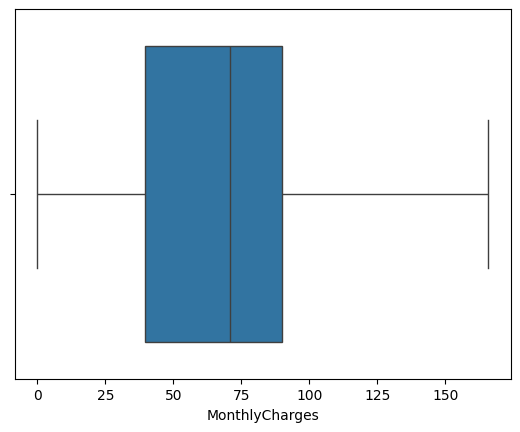

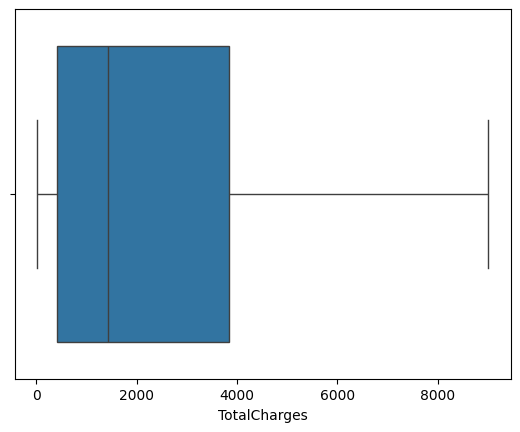

In [105]:
for col in numerical_cols:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap values
    x_train.loc[x_train[col] > upper, col] = upper
    x_train.loc[x_train[col] < lower, col] = lower
    x_test.loc[x_test[col] > upper, col] = upper
    x_test.loc[x_test[col] < lower, col] = lower
    
print('Persebaran data setelah ditangani Outlier:')
print(x_train[numerical_cols].describe(),'\n')
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=x_train['tenure'])
plt.show()
plt.figure()
sns.boxplot(x=x_train['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=x_train['TotalCharges'])
plt.show()

Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali. Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

## Encoding Data

In [106]:
# mapping target variable
y_train = y_train.map({'Yes':1, 'No':0})
y_test = y_test.map({'Yes':1, 'No':0})
print(y_train.value_counts())
print(y_test.value_counts())

# encoding categorical variables
categorical_cols = x_train.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  
ohe.fit(x_train[categorical_cols])  # Fit on Train

# Transform Train and Test
x_train_ohe = pd.DataFrame(ohe.transform(x_train[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols), index=x_train.index)
x_test_ohe = pd.DataFrame(ohe.transform(x_test[categorical_cols]), columns=ohe.get_feature_names_out(categorical_cols), index=x_test.index)

# Drop original categorical columns and concatenate OHE columns
x_train = pd.concat([x_train.drop(categorical_cols, axis=1), x_train_ohe], axis=1)
x_test = pd.concat([x_test.drop(categorical_cols, axis=1), x_test_ohe], axis=1)
print(f"Setelah One-Hot Encoding, fitur latih memiliki dimensi: {x_train.shape}")
print(f"Setelah One-Hot Encoding, fitur tes memiliki dimensi: {x_test.shape}")  
print(x_train.head())
print(x_test.head())

Churn
0.0    4106
1.0    1473
Name: count, dtype: int64
Churn
0.0    1022
1.0     373
Name: count, dtype: int64
Setelah One-Hot Encoding, fitur latih memiliki dimensi: (5613, 45)
Setelah One-Hot Encoding, fitur tes memiliki dimensi: (1404, 45)
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Female  \
5328              0    55.0           66.05       3462.10            1.0   
1324              0     4.0           20.35         76.35            1.0   
6546              0    24.0           51.15       1275.70            0.0   
1758              0    68.0           20.05       1386.90            1.0   
2545              0    62.0           70.75       4263.45            1.0   

      gender_Male  Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  \
5328          0.0         0.0          1.0            1.0             0.0   
1324          0.0         0.0          1.0            0.0             1.0   
6546          1.0         1.0          0.0            1.0           

## Scalling

In [ ]:
# scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train[numerical_cols])  # Fit on Train
x_train[numerical_cols] = scaler.transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])
print(x_train.head())
print(x_test.head())

## Handling Imbalanced Class

Bisa dilihat pada EDA terdapat imbalace class pada curn, sehingga perlu di tangani menggunakan resampling

In [ ]:
# Cek dan konfirmasi keberadaan nilai NaN di y_train
nan_count = y_train.isnull().sum()
print(f"Jumlah nilai NaN di y_train SEBELUM pembersihan: {nan_count}")

# Lakukan pembersihan HANYA jika ada NaN
if nan_count > 0:
    print("Menemukan NaN di y_train, memulai proses pembersihan...")
    
    # Dapatkan index dari baris di mana y_train BUKAN NaN
    valid_indices = y_train.notna()
    
    # Filter x_train dan y_train untuk hanya menyimpan baris yang valid
    x_train_cleaned = x_train[valid_indices]
    y_train_cleaned = y_train[valid_indices]
    
    print(f"Ukuran data latih sebelum: {len(y_train)}, setelah dibersihkan: {len(y_train_cleaned)}")
    print(f"Jumlah nilai NaN di y_train SETELAH pembersihan: {y_train_cleaned.isnull().sum()}")

else:
    print("Tidak ada NaN di y_train, tidak perlu pembersihan.")
    x_train_cleaned = x_train
    y_train_cleaned = y_train

print("-" * 30)

Jumlah nilai NaN di y_train SEBELUM pembersihan: 34
Menemukan NaN di y_train, memulai proses pembersihan...
Ukuran data latih sebelum: 5613, setelah dibersihkan: 5579
Jumlah nilai NaN di y_train SETELAH pembersihan: 0
------------------------------


In [111]:
from imblearn.combine import SMOTEENN
    
smote_enn = SMOTEENN(random_state=42)
x_train_resampled, y_train_resampled = smote_enn.fit_resample(x_train_cleaned, y_train_cleaned)
    
print(f"Ukuran data latih asli: {x_train_cleaned.shape[0]} baris")
print(f"Ukuran data latih setelah SMOTEENN: {x_train_resampled.shape[0]} baris")
print(f"ukuran distribusi kelas Churn sebelum resampling:")
print(y_train_cleaned.value_counts())
print("\nDistribusi kelas Churn setelah resampling:")
print(y_train_resampled.value_counts())

Ukuran data latih asli: 8212 baris
Ukuran data latih setelah SMOTEENN: 4599 baris
ukuran distribusi kelas Churn sebelum resampling:
Churn
0.0    4106
1.0    4106
Name: count, dtype: int64

Distribusi kelas Churn setelah resampling:
Churn
1.0    2502
0.0    2097
Name: count, dtype: int64


# Modelling dengan Logistic Regression

In [112]:
# Fungsi helper untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, ('No churn', 'Churn'), ('No churn', 'Churn'))
    plt.figure()
    heatmap = sns.heatmap(cm_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.title(title, fontsize=18, color='darkblue')
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    plt.tight_layout()
    plt.show()

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      2097
         1.0       0.92      0.94      0.93      2502

    accuracy                           0.92      4599
   macro avg       0.92      0.92      0.92      4599
weighted avg       0.92      0.92      0.92      4599



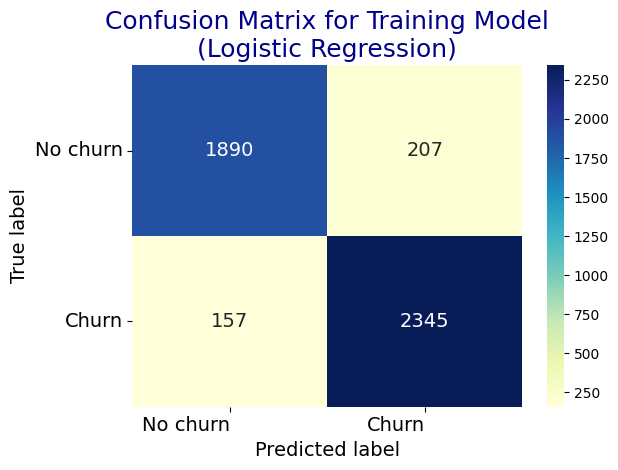

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

log_model = LogisticRegression().fit(x_train_resampled, y_train_resampled)

# performa model training
# Predict
y_train_pred = log_model.predict(x_train_resampled)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train_resampled, y_train_pred))
# confusion matrix data training
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train_resampled, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
# Plot confusion matrix data training
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()


Evaluasi ini dilakukan pada data latih yang telah melalui proses resampling (SMOTE-ENN) untuk menyeimbangkan kelas target.

Observasi:

* Dapat kita ketahui bahwa model menunjukkan performa yang sangat tinggi dengan akurasi mencapai 92%.
* Nilai Precision dan Recall seimbang di angka 0.92 untuk kedua kelas (Churn dan No Churn).

Hasil yang sangat tinggi pada data latih ini menunjukkan bahwa model mampu mempelajari pola dari data hasil resampling dengan sangat baik. Namun, nilai yang terlalu sempurna ini perlu disikapi dengan hati-hati karena bisa jadi merupakan indikasi awal bahwa model terlalu menghafal data (overfitting), terutama karena data latih merupakan data sintetis hasil SMOTE.

In [117]:
# Cek dan bersihkan NaN pada y_test (jika ada)
nan_count_test = y_test.isnull().sum()
print(f"Jumlah nilai NaN di y_test SEBELUM pembersihan: {nan_count_test}")

if nan_count_test > 0:
    print("Membersihkan NaN dari data tes...")
    # Dapatkan index baris yang valid (bukan NaN) di y_test
    valid_indices = y_test.notna()
    
    # Filter y_test dan x_test_processed menggunakan index yang valid
    y_test_cleaned = y_test[valid_indices]
    x_test_cleaned = x_test[valid_indices]
    
    print(f"Jumlah nilai NaN di y_test SETELAH pembersihan: {y_test_cleaned.isnull().sum()}")
else:
    print("Tidak ada NaN di y_test.")
    y_test_cleaned = y_test
    x_test_cleaned = x_test

print("-" * 50)

Jumlah nilai NaN di y_test SEBELUM pembersihan: 9
Membersihkan NaN dari data tes...
Jumlah nilai NaN di y_test SETELAH pembersihan: 0
--------------------------------------------------


Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1022
         1.0       0.53      0.76      0.62       373

    accuracy                           0.76      1395
   macro avg       0.71      0.76      0.72      1395
weighted avg       0.80      0.76      0.77      1395



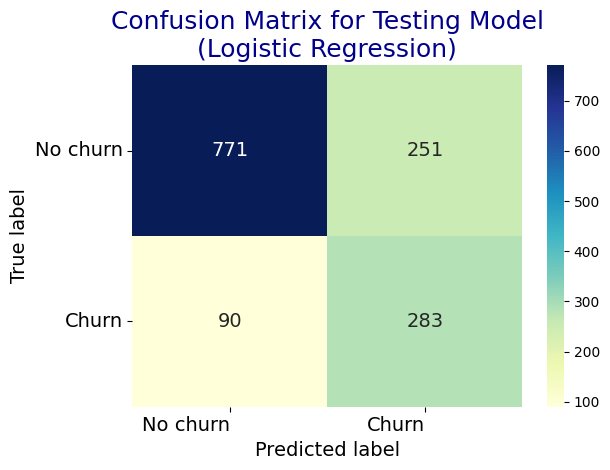

In [ ]:
# Performa model testing
# Predict
y_test_pred = log_model.predict(x_test_cleaned)
# Print classification report
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test_cleaned, y_test_pred))
# confusion matrix data testing
# Form confusion matrix as a DataFrames
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test_cleaned, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))
# Plot confusion matrix data testing
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)   
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

Evaluasi ini dilakukan pada data testing yang merupakan data asli (imbalanced) dan belum pernah dilihat oleh model sebelumnya. Ini merupakan representasi performa model di dunia nyata.

Observasi:

* Akurasi model mengalami penurunan menjadi 76%.
* Recall (Churn): 76%. Model berhasil mendeteksi 76% dari total pelanggan yang benar-benar Churn.
* Precision (Churn): 53%. Terdapat cukup banyak kesalahan prediksi di mana pelanggan setia (No Churn) diprediksi akan Churn (False Positive).

Terdapat kecenderungan model bersikap "agresif" dalam memprediksi Churn. Hal ini terlihat dari tingginya angka False Positive (~260 data).

Meskipun akurasi turun, nilai Recall yang cukup tinggi (0.76) dinilai positif untuk kasus bisnis ini, karena prioritas utama adalah mendeteksi sebanyak mungkin pelanggan yang berpotensi pindah, meskipun dengan risiko memprediksi salah beberapa pelanggan setia.

## Learning Curve

Grafik Learning Curve digunakan untuk mendiagnosa apakah model mengalami masalah Bias atau Variance.

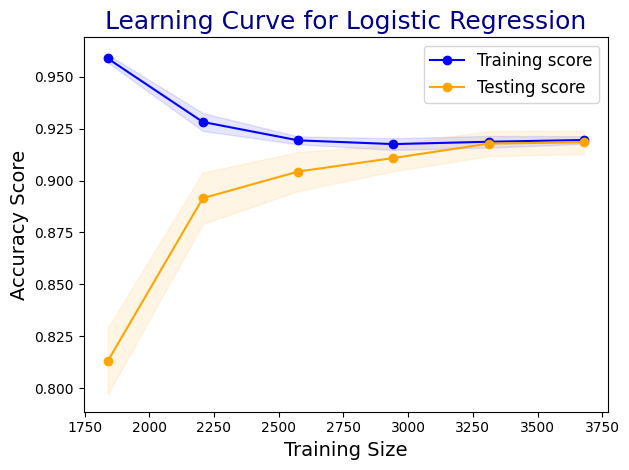

In [ ]:
# Learning Curve
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(log_model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))    

# Calculate mean and std for training and testing scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Testing score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')
plt.title('Learning Curve for Logistic Regression', fontsize=18, color='darkblue')  
plt.xlabel('Training Size', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa model mengalami High Variance (Overfitting).

Model bekerja sangat baik pada data latih, namun performanya menurun secara signifikan saat diuji dengan data validasi. Ini mengkonfirmasi bahwa model kesulitan melakukan generalisasi pada data baru yang memiliki pola sedikit berbeda dari data latih.

# Kesimpulan

Secara keseluruhan, model Logistic Regression ini layak digunakan dengan catatan bahwa model lebih memprioritaskan Recall (kemampuan mendeteksi Churn) dibandingkan presisi. Untuk pengembangan selanjutnya, disarankan untuk mencoba algoritma lain seperti Random Forest atau melakukan hyperparameter tuning guna mengurangi efek overfitting yang terlihat pada Learning Curve.